<a href="https://colab.research.google.com/github/kulahe3/itws-4960/blob/main/Applied_Quantum_Computing_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lab 3: Applied Quantum Computing (AQC)
# Unary and Binary Gates examples.
# These examples are created to build your foundation on programming skills
# and understand how the Unary and Binary Operators work.
# Lab 3 code examples are given to you in order to understand the concepts you
# learnt during the class. So make sure to compare what you saw on the lecture
# presentation slides and in-class activities.

In [2]:
# Corrected Installation (Standard for 2026)
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

print("Setup Complete! All visualization engines ready.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.7 MB/s eta 0:00:00
Setup Complete! All visualization engines ready.


In the lab, use the Operator module to generate the exact matrix for any combination of gates. This is the "Truth Table" for the manual hands on calculations we did during the class. Now we code those in-class exercises
using the Qiskit enviroment.

In [3]:
from qiskit.quantum_info import Operator
from qiskit.circuit.library import XGate, ZGate

# Define single-qubit operators
X = Operator(XGate())
Z = Operator(ZGate())

# Calculate the Tensor Product (X ⊗ Z)
XZ_operator = X.tensor(Z)

print(XZ_operator.data)

[[ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]]


In Qiskit, creating the NOT gate (Pauli-X gate) and vizualizing the X gate looks like this

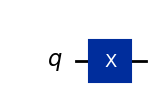

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

Hadamard (H) gate and it's visualization:

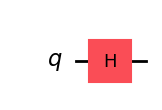

In [5]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

Pauli-Z gate:

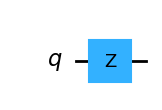

In [6]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw("mpl")

This is the first circuit diagram we see with two qubits, which are represented by the two wires. The CNOT gate is implemented between the two qubits, with
q_0 as control and q_1 as target.

**CNOT** Gate

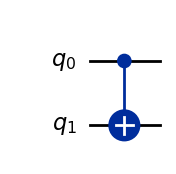

In [7]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

**SWAP** Gate and it's visual representation

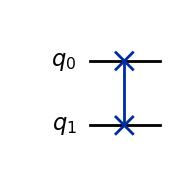

In [8]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.draw("mpl")

**Exercise**: Now, try this exercise of swaping 1 to 0.

In [ ]:
# write your code below using SWAP gate to swap 1 to 0.
# Use the code snippet given above and modify that to SWAP 1 to 0

The SWAP gate can actually be constructed from three CNOTs. To see how, we can use the decompose() the gate with Qiskit:

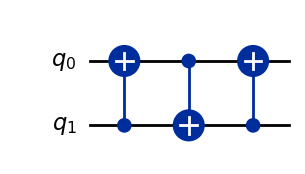

In [9]:
qc = QuantumCircuit(2)
qc.swap(1, 0)
qc.decompose().draw("mpl")

**Exercise 2**: Unary Operators:
In class, we learned that the Pauli-X gate is a "bit-flip." Let's verify its matrix representation and apply it. Complete these code exercises by running them as practice.

In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex

# 1. Create a 1-qubit circuit
qc = QuantumCircuit(1)
qc.x(0)  # Apply the Pauli-X (NOT) gate

# 2. Extract the Matrix (Operator) from the circuit
# This shows students the 2x2 matrix they saw on the slides
op = Operator.from_circuit(qc)
print("The Matrix for Pauli-X:")
display(op.draw('latex'))

# 3. Apply the gate to the ket-zero (state |0> ).
initial_state = Statevector([1, 0])  # Representing |0>
final_state = initial_state.evolve(qc)

print("\nThe final state vector after X-gate:")
display(final_state.draw('latex'))

The Matrix for Pauli-X:


<IPython.core.display.Latex object>


The final state vector after X-gate:


<IPython.core.display.Latex object>

Here we see how multiple gates are shown in a circuit diagram. We read it from left to right, so the leftmost gate is applied first.



**Exercise 3**: Binary Operators (CNOT)
For two qubits, our matrices grow to $4 \times 4$. Let's look at the "Conditional-NOT" (CNOT) gate.

The 4x4 CNOT Matrix:


<IPython.core.display.Latex object>


Circuit Diagram:


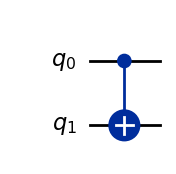

In [11]:
# Create a 2-qubit circuit
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1)  # Control = Qubit 0, Target = Qubit 1

# 2. Visualize the 4x4 Matrix
cnot_matrix = Operator.from_circuit(qc_cnot)
print("The 4x4 CNOT Matrix:")
display(cnot_matrix.draw('latex'))

# 3. Visualize the circuit diagram
print("\nCircuit Diagram:")
qc_cnot.draw('mpl')

**Exercise 4**: The SWAP Gate.
Now, let's verify that a SWAP gate trades the states of two qubits. We will start with state $|01\rangle$ and see if it becomes $|10\rangle$.

Final State Vector (Should be |10>):


<IPython.core.display.Latex object>

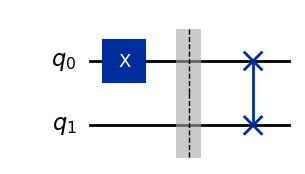

In [13]:
# Create a 2-qubit circuit and initialize to |01>
# In Qiskit, qubit ordering is |q1 q0>, so to get |01>, we flip qubit 0
qc_swap = QuantumCircuit(2)
qc_swap.x(0)  # Qubit 0 becomes 1, Qubit 1 remains 0 -> State is |01>
qc_swap.barrier() # Visual separator

# 2. Apply the SWAP gate
qc_swap.swap(0, 1)

# 3. Check the final state vector
state = Statevector.from_instruction(qc_swap)
print("Final State Vector (Should be |10>):")
display(state.draw('latex'))

# 4. Draw the final circuit
qc_swap.draw('mpl')

In [14]:
from qiskit.visualization import plot_bloch_multivector
# print("Visualization module loaded successfully!")

In [15]:
#  Setup
try:
    import qiskit
except ImportError:
    !pip install qiskit qiskit-aer qiskit-visualization matplotlib --quiet

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt



In [16]:
# Import the toolbox
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

print("Libraries imported and ready for use.")

Libraries imported and ready for use.


In [17]:
#
# Let's define the state: |psi> = (1/sqrt(2))|0> + (1/sqrt(2))|1>
v = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

# Calculate the inner product (Bra-Ket)
inner_product = np.vdot(v, v)

# Calculate the Norm (Square root of inner product)
norm = np.sqrt(inner_product)

print(f"Vector components: {v}")
print(f"The calculated L2 Norm is: {norm:.4f}")

# Final Check
if np.isclose(norm, 1.0):
    print(" VALID: This vector is a normalized quantum state.")
else:
    print(" INVALID: This vector cannot exist in a quantum system.")

Vector components: [0.70710678 0.70710678]
The calculated L2 Norm is: 1.0000
 VALID: This vector is a normalized quantum state.


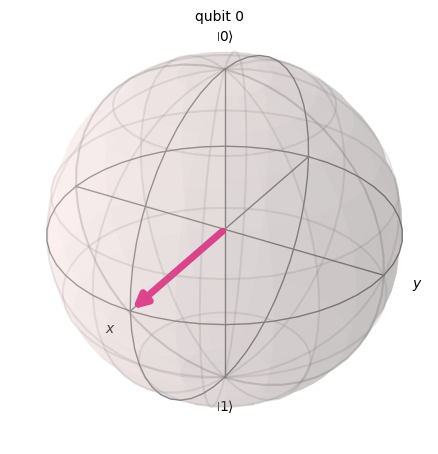

In [18]:
# Visualizations
# Make sure to complete following exercises (from Lab2)as they are linked with
# Lab 3 (Lab 2 and Lab 3 got overlapping sections for visualizations).
# Convert our array into a Qiskit Statevector object
state = Statevector(v)

# Plotting
plot_bloch_multivector(state)

Modify the example vectors and run your code to create different vectors.

Modify the code below to test different vectors.

Task A: Test the vector [0.6, 0.8]. Is it valid?

Task B: Test a complex state: [0.5, (np.sqrt(3)/2)*1j]. (Remember, in Python imaginary numbersare written as "j").

When you run Task C with [1, 1], you will see a norm of 1.414.

Task C: Test [1, 1]. Observe the error or the visualization.

In [23]:

# Edit the line below to test the different vectors mentioned above
my_vector = np.array([1, 1])

# Calculation Logic
my_norm = np.sqrt(np.vdot(my_vector, my_vector))

print(f"Testing vector: {my_vector}")
print(f"Norm result: {my_norm:.4f}")

# Visualize the result
if np.isclose(my_norm, 1.0):
    display(plot_bloch_multivector(Statevector(my_vector)))
else:
    print("Visualizer skipped: The state is not normalized.")

Testing vector: [1 1]
Norm result: 1.4142
Visualizer skipped: The state is not normalized.


*Hands*-On work: Visualizing Rotations
We will create a circuit, apply a gate, and see where the vector lands.

State after X-gate:


<IPython.core.display.Latex object>

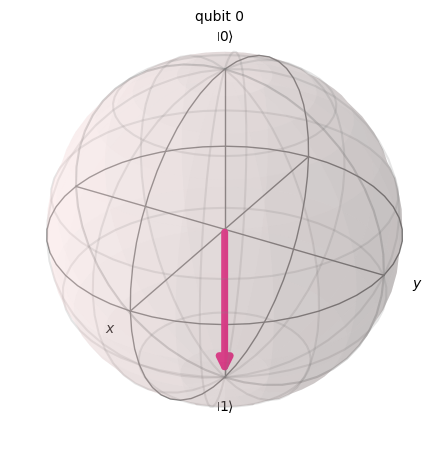

In [25]:
# The X-Gate (NOT Gate)
# 1. Create a circuit with 1 qubit
qc = QuantumCircuit(1)

# 2. Apply the X gate (NOT gate)
qc.x(0)

# 3. Get the statevector
state = Statevector.from_instruction(qc)

print("State after X-gate:")
display(state.draw('latex'))
plot_bloch_multivector(state)

The Hadamard Gate (Creating Superposition)The H-gate is the most important gate in quantum computing. It moves a state from the "North Pole" \ket{0} to the "Equator."

State after H-gate (Superposition):


<IPython.core.display.Latex object>

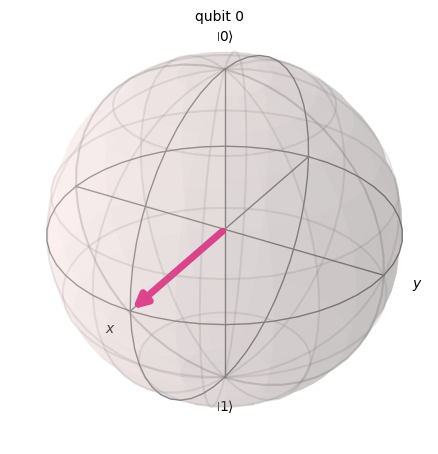

In [26]:
# The Hadamard (H) Gate
qc_h = QuantumCircuit(1)
qc_h.h(0) # Apply Hadamard

state_h = Statevector.from_instruction(qc_h)

print("State after H-gate (Superposition):")
display(state_h.draw('latex'))
plot_bloch_multivector(state_h)

Supplementary: Matrix & Tensor OperationsFor the 6000-level students (and interested 4000-level students), we must understand the underlying linear algebra.A.

**Matrix Multiplication**


Applying a gate to a qubit is mathematically equivalent to multiplying a Matrix by a Vector.$$\ket{\psi_{new}} = G \ket{\psi_{old}}$$

In [ ]:
# Matrix, Vector Multiplication
# The X-gate Matrix
X = np.array([[0, 1], [1, 0]])

# The Ket |0>
ket0 = np.array([1, 0])

# Apply X to |0> using np.dot
result = np.dot(X, ket0)

print(f"X-Gate Matrix:\n{X}")
print(f"Result of X|0>: {result} (This is |1>!)")

X-Gate Matrix:
[[0 1]
 [1 0]]
Result of X|0>: [0 1] (This is |1>!)
